In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('msi_distribution.txt', sep= '\t')

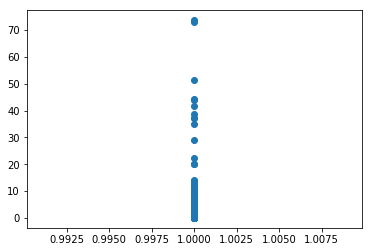

In [2]:
ones = [1]*143
plt.scatter(ones,data)
plt.show()

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
data_msi = pd.read_csv('MSI_total.txt', sep = '\t')
data_msi['State']='MMRp'
data_msi.head()

,sample,%,State
0,LP11,6.67,MMRp
1,LP12,0.00,MMRp
2,LP13,6.78,MMRp
3,LP15,7.14,MMRp
4,LP16,51.35,MMRp


In [169]:
msi_samples = ['LP16', 'LP17', 'LP18', 'LP19','LP20', 'LP21', 'LP22', 'LP24', 'LP25', 'LP26', 'LP30', 'LP37',
               'LP124', 'OVE16','OVE31', 'OVE42', 'OVE59', 'OVE64', 'OVE86', '16T131', 'MDA5', 'MDA9', 'MDA15',
               'MDA16-NG', 'MDA16']

In [170]:
for msi in msi_samples:
    if msi in data_msi['sample'].values:
        data_msi.loc[data_msi['sample'] == msi, 'State'] = 'MMRd'

In [171]:
data_msi.loc[data_msi["sample"]=="OVE61"]

,sample,%,State


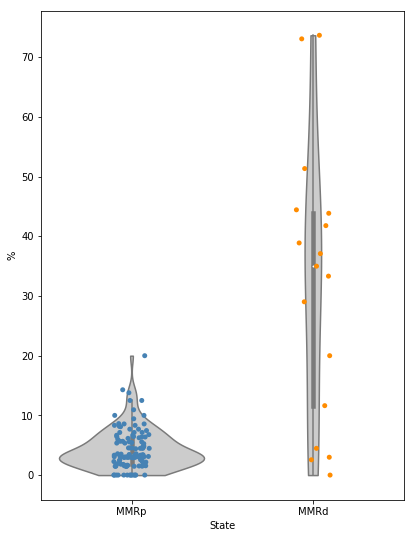

In [172]:
import seaborn as sns
order_list = ['MMRp', 'MMRd']
sns.violinplot(x='State', y='%', data=data_msi, color="0.8",cut=0, order=order_list)
sns.stripplot(x='State', y='%', data=data_msi, jitter=True, order=order_list,
              palette = ['steelblue', 'darkorange'])
plt.savefig('MSI_plot.png')
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MMRp v.s. MMRd: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.893e-06 U_stat=3.230e+02


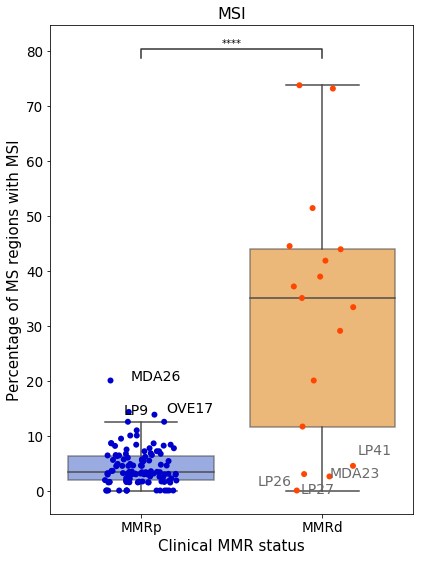

In [177]:
import statannot
import random
import numpy as np

order_list = ['MMRp', 'MMRd']
plt.rcParams["figure.figsize"] = (6.5,9)
fig, ax = plt.subplots()
ax = sns.boxplot(x='State', y='%', data=data_msi, order=order_list, 
                 palette = ['royalblue', 'darkorange'], showfliers=False, boxprops=dict(alpha=0.6))
# add stripplot
np.random.seed(10)
ax = sns.stripplot(x='State', y='%', data=data_msi, order=order_list, 
                   jitter=0.2, size=6, palette = ['mediumblue', 'orangered'])

# Labelling outliers
from matplotlib.cbook import boxplot_stats
outliers_df = pd.DataFrame(columns = ['sample', '%', 'State'])
for state in data_msi['State'].unique():
        outliers = [y for stat in boxplot_stats(data_msi[data_msi['State'] == state]['%']) for y in stat['fliers']]
        if outliers != []:
                for outlier in outliers:
                        outliers_df = outliers_df.append(data_msi[(data_msi['State'] == state) & (data_msi['%'] == outlier)])

# Annotating manually
ax.annotate(s=outliers_df['sample'][15], xy=(0, outliers_df['%'][15]), xytext=(-17,0), textcoords='offset points', fontsize=14)
ax.annotate(s=outliers_df['sample'][79], xy=(0, outliers_df['%'][79]), xytext=(-10,0), textcoords='offset points', fontsize=14)
ax.annotate(s=outliers_df['sample'][81], xy=(0, outliers_df['%'][81]), xytext=(25,0), textcoords='offset points', fontsize=14)
ax.annotate(s=data_msi['sample'][25], xy=(1, data_msi['%'][25]), xytext=(-65,5), textcoords='offset points', fontsize=14, color = 'dimgray')
ax.annotate(s=data_msi['sample'][26], xy=(1, data_msi['%'][26]), xytext=(-22,-15), textcoords='offset points', fontsize=14, color = 'dimgray')
ax.annotate(s=data_msi['sample'][62], xy=(1, data_msi['%'][62]), xytext=(7,-12), textcoords='offset points', fontsize=14, color = 'dimgray')
ax.annotate(s=data_msi['sample'][99], xy=(1, data_msi['%'][99]), xytext=(35,5), textcoords='offset points', fontsize=14, color = 'dimgray')
#ax.annotate(s=data_msi['sample'][30], xy=(1, data_msi['%'][30]), xytext=(17,-14), textcoords='offset points', fontsize=14, color = 'dimgray')
#ax.annotate(s=data_msi['sample'][35], xy=(1, data_msi['%'][35]), xytext=(-75,-14), textcoords='offset points', fontsize=14, color = 'dimgray')

ax.set_xlabel("Clinical MMR status",fontsize=15)
ax.set_ylabel("Percentage of MS regions with MSI",fontsize=15)
ax.tick_params(labelsize=13.5)

# Annotating outliers
#i=3
#j=30
#for row in outliers_df.iterrows():
#        i=i*(-1)
#        j=j*(-1)
#        if row[1]['State'] == "MMRp":
#            ax.annotate(s=row[1]['sample'], xy=(0, row[1]['%']), xytext=(j,i), textcoords='offset points', fontsize=12)
#        else:
#            ax.annotate(s=row[1]['sample'], xy=(2, row[1]['%']), xytext=(j,i), textcoords='offset points', fontsize=12)

# Adding statistical significance

import statannot
statannot.add_stat_annotation(
    ax,
    data=data_msi,
    x='State',
    y='%',
    box_pairs=[("MMRp", "MMRd")],
    order = ['MMRp', 'MMRd'],
    test="Mann-Whitney",
    text_format="star",
    loc="inside")

#plt.show()
plt.title("MSI", fontsize= 16)
plt.savefig('./MSI_boxplot_poster.png');

In [174]:
outliers_df

,sample,%,State
15,LP9,13.79,MMRp
79,MDA26,20.00,MMRp
81,OVE17,14.29,MMRp


In [178]:
data_msi[(data_msi['State']=="MMRd") & (data_msi['%']>10)]

,sample,%,State
4,LP16,51.35,MMRd
5,LP17,35.00,MMRd
6,LP18,43.86,MMRd
8,LP21,37.10,MMRd
9,LP22,29.03,MMRd
22,16T131,38.89,MMRd
29,LP30,73.68,MMRd
34,LP37,73.08,MMRd
53,OVE64,44.44,MMRd
66,MDA16,41.79,MMRd


In [154]:
len(data_msi[data_msi['State']=="MMRp"])

120